<a href="https://colab.research.google.com/github/fereol023/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation du dataset depuis google drive

In [2]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

data = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
data.head()

Mounted at /content/drive


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


Exploration

In [ ]:
line = "============"*4
sep = "\n"
# dimensions de la table des données (propriété shape)
print(data.shape)
print(sep)
# liste des colonnes data.columns
print(line)
print(data.columns)
print(sep)
# liste des colonnes et leurs types (propriété dtypes)
print(line)
print(data.dtypes)
print(sep)
#compter les valeurs nulles
print(line)
print(data.isnull().sum())
print(sep)
#description des données
print(line)
data.describe()

Data visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Taille du dataset :  (284807, 31)
Il y a : 492  observations classées dans la classe 1 (fraude).


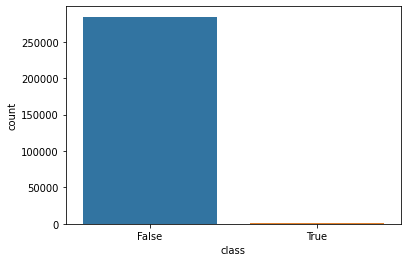

In [4]:
# variable class
target=data["class"]
sns.countplot(target)
print("Taille du dataset : ", data.shape)
print("Il y a :",sum(data["class"])," observations classées dans la classe 1 (fraude).")

On remarque que la variable cible est très déséquilibrée.

TypeError: ignored

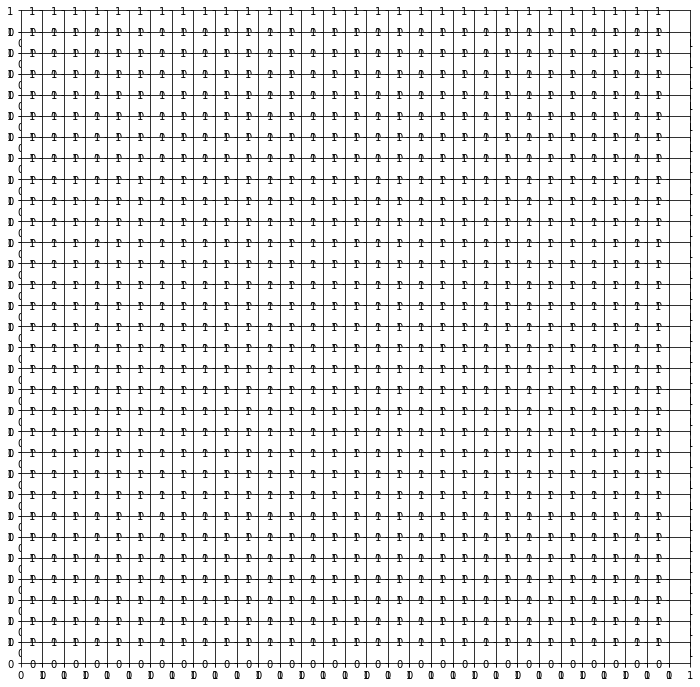

In [5]:
# matrice des distributions des variables explicatives 
pd.plotting.scatter_matrix(data,c=data['class'],figsize=(12,12), marker='o',s=20,alpha=0.8)
plt.show()

Minimal preprocessing

In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

y = data.iloc[:,-1]
X = data.iloc[:,:-1]

print("Matrice des X")
print(X)
print(sep)
print(line)
print(y)

y = LabelBinarizer().fit_transform(y)
print(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Matrice des X
          time         v1         v2        v3        v4        v5        v6  \
0            0  -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0   1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1  -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1  -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2  -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...        ...        ...       ...       ...       ...       ...   
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              v7        v

Minimal estimations : LR, SGD classifier  
Justification : Sachant qu'on a jeu de données de plus de 200 000 observations, il ne serait pas efficace d'utiliser des modèles qui se classent les observations en se basant sur leurs distance par rapport aux autres observations du dataset. Le temps de calcul serait trop long pour chaque output. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[85246    47]
 [   50   100]]
Accuracy score :  99.89  %.
Recall score/taux de vraies fraudes détectées :  66.67  %.
Specificity score/fraudes non détectées :  0.06  %.


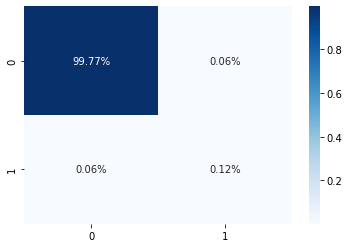

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[85283    10]
 [  150     0]]
Accuracy score :  99.81  %.
Recall score/taux de vraies fraudes détectées :  0.0  %.
Specificity score/fraudes non détectées :  0.01  %.


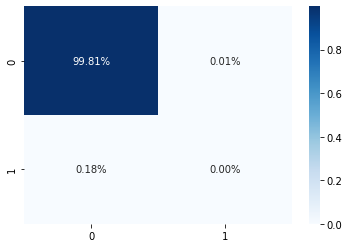

In [7]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from  sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estimation LR
clfLR = LogisticRegression()
clfLR.fit(x_train, y_train)
y_pred = clfLR.predict(x_test)

# Evaluation
acc_scoreLR = accuracy_score(y_test, y_pred)
tprLR = recall_score(y_test, y_pred)
cmLR = confusion_matrix(y_test, y_pred)
fprLR = cmLR[0,1]/(cmLR[0,1]+cmLR[0,0])# spécificité
print(line)
print(cmLR)
print("Accuracy score : ",round(acc_scoreLR*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprLR*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprLR*100,2), " %.")

print(line)
sns.heatmap(cmLR/np.sum(cmLR), annot=True, fmt='.2%', cmap="Blues")
plt.show()

# Estimation SGDClassifier
clfSGD = SGDClassifier(loss='squared_error', max_iter=1000)
clfSGD = clfSGD.fit(x_train, y_train)
y_pred = clfSGD.predict(x_test)

# Evaluation
acc_scoreSGD = accuracy_score(y_test, y_pred)
tprSGD = recall_score(y_test, y_pred)
cmSGD = confusion_matrix(y_test, y_pred)
fprSGD = cmSGD[0,1]/(cmSGD[0,1]+cmSGD[0,0])# spécificité
print(line)
print(cmSGD)
print("Accuracy score : ",round(acc_scoreSGD*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprSGD*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprSGD*100,2), " %.")

print(line)
sns.heatmap(cmSGD/np.sum(cmSGD), annot=True, fmt='.2%', cmap="Blues")
plt.show()

Le modèle LR détecte 67% des fraudes. 

CROSS VALIDATION

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits = 5, shuffle = True)
cv_score = cross_val_score(clfLR, X, y, cv=skf, scoring='recall')